## Powerlifting Dataset

As a former powerlifter, this dataset caught my eye! I wanted to explore this to bring back memories!

This dataset is a snapshot of the OpenPowerlifting database as of April 2019. OpenPowerlifting is creating a public-domain archive of powerlifting history. Powerlifting is a sport in which competitors compete to lift the most weight for their class in three separate barbell lifts: the Squat, Bench, and Deadlift. Source: https://www.openpowerlifting.org/

Here I use the dataset to predict what someone's bench press would be based on their age, weight and gender.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('openpowerlifting.csv')
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [3]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

In [4]:
# Drop duplicates
df = df.drop_duplicates(keep= 'first')

# Check the shape 
df.shape

(1420270, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420270 entries, 0 to 1423353
Data columns (total 37 columns):
Name               1420270 non-null object
Sex                1420270 non-null object
Event              1420270 non-null object
Equipment          1420270 non-null object
Age                756162 non-null float64
AgeClass           784981 non-null object
Division           1412100 non-null object
BodyweightKg       1403552 non-null float64
WeightClassKg      1406966 non-null object
Squat1Kg           337121 non-null float64
Squat2Kg           332894 non-null float64
Squat3Kg           323413 non-null float64
Squat4Kg           3690 non-null float64
Best3SquatKg       1029488 non-null float64
Bench1Kg           499112 non-null float64
Bench2Kg           492833 non-null float64
Bench3Kg           477858 non-null float64
Bench4Kg           9467 non-null float64
Best3BenchKg       1273409 non-null float64
Deadlift1Kg        363041 non-null float64
Deadlift2Kg        355533 non

In [6]:
df.nunique()

Name               412574
Sex                     2
Event                   7
Equipment               5
Age                   192
AgeClass               16
Division             4842
BodyweightKg        11956
WeightClassKg         224
Squat1Kg             1343
Squat2Kg             1663
Squat3Kg             1827
Squat4Kg              799
Best3SquatKg         1907
Bench1Kg             1439
Bench2Kg             1781
Bench3Kg             1933
Bench4Kg             1108
Best3BenchKg         1883
Deadlift1Kg          1140
Deadlift2Kg          1541
Deadlift3Kg          1734
Deadlift4Kg          1002
Best3DeadliftKg      1734
TotalKg              5519
Place                 124
Wilks               58041
McCulloch           59221
Glossbrenner        55340
IPFPoints           65117
Tested                  1
Country               176
Federation            222
Date                 5367
MeetCountry            96
MeetState             111
MeetName            11599
dtype: int64

In [7]:
length = len(df)
print("Percent of nulls:", round(df.isnull().sum() / length * 100, 2))


Percent of nulls: Name                0.00
Sex                 0.00
Event               0.00
Equipment           0.00
Age                46.76
AgeClass           44.73
Division            0.58
BodyweightKg        1.18
WeightClassKg       0.94
Squat1Kg           76.26
Squat2Kg           76.56
Squat3Kg           77.23
Squat4Kg           99.74
Best3SquatKg       27.51
Bench1Kg           64.86
Bench2Kg           65.30
Bench3Kg           66.35
Bench4Kg           99.33
Best3BenchKg       10.34
Deadlift1Kg        74.44
Deadlift2Kg        74.97
Deadlift3Kg        76.10
Deadlift4Kg        99.35
Best3DeadliftKg    24.01
TotalKg             7.74
Place               0.00
Wilks               8.36
McCulloch           8.37
Glossbrenner        8.36
IPFPoints          10.51
Tested             23.16
Country            72.66
Federation          0.00
Date                0.00
MeetCountry         0.00
MeetState          33.88
MeetName            0.00
dtype: float64


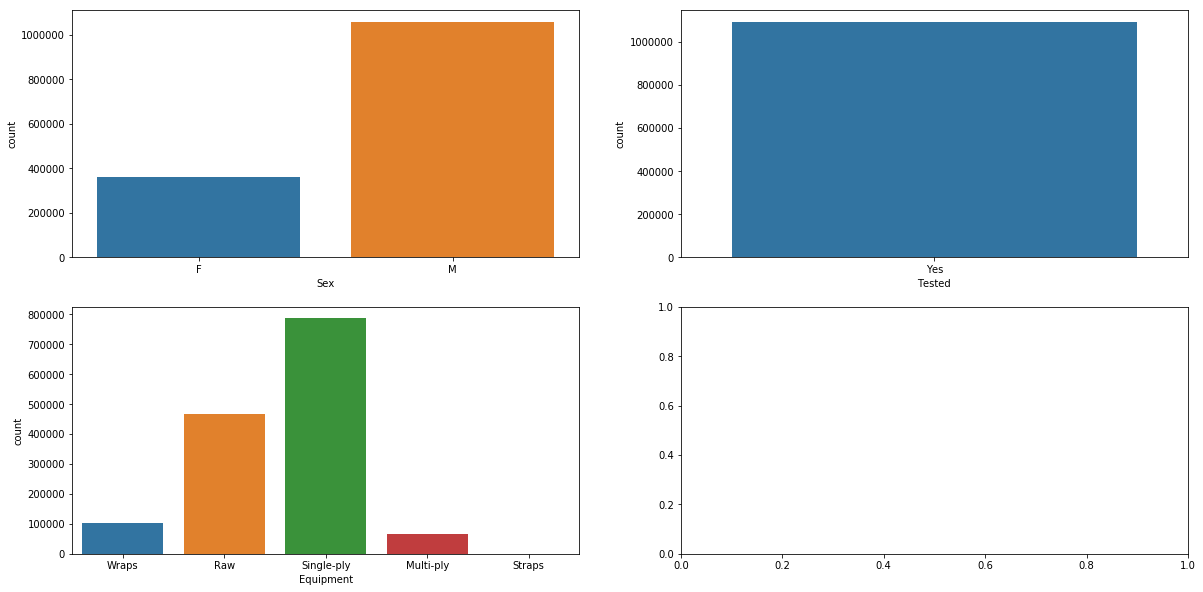

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
sns.countplot(df['Sex'], ax=ax[0,0])
sns.countplot(df['Tested'], ax=ax[0,1])
sns.countplot(df['Equipment'], ax=ax[1,0])



Maximum bodyweight:  258.0 kg
Minimum bodyweight:  15.1 kg


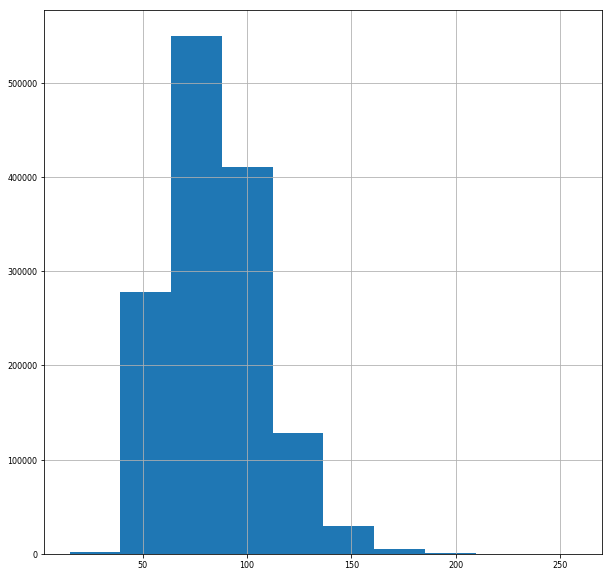

In [9]:
df["BodyweightKg"].hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8)
print("Maximum bodyweight: ", df.BodyweightKg.max(),"kg")
print("Minimum bodyweight: ", df.BodyweightKg.min(), "kg")

Maximum Age:  97.0
Average Age:  31.498582975605757
Minimum Age:  0.0


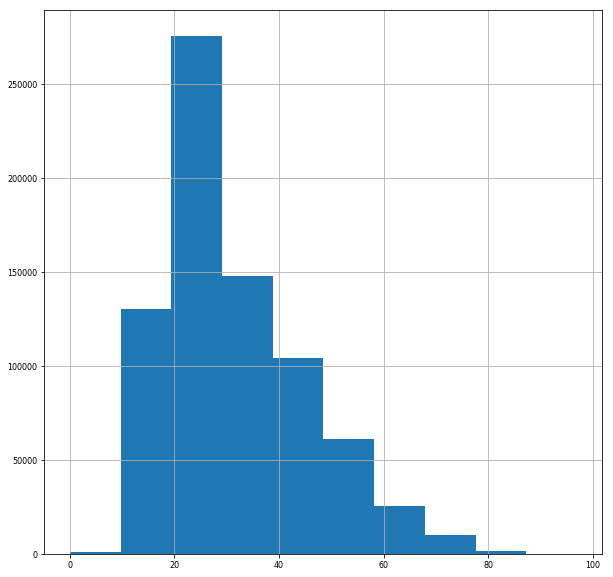

In [10]:
df["Age"].hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8)
print("Maximum Age: ", df.Age.max())
print("Average Age: ", df.Age.mean())
print("Minimum Age: ", df.Age.min())

Biggest Squat:  575.0
Average Squat:  174.00985284931073
Lowest Squat:  -477.5


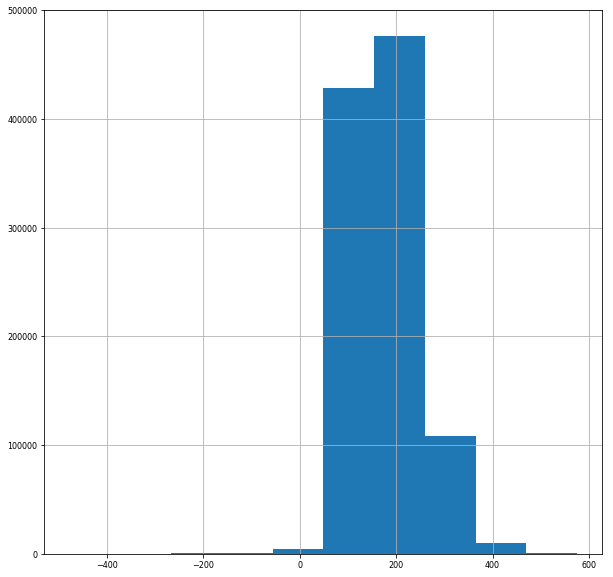

In [11]:
df["Best3SquatKg"].hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8)
print("Biggest Squat: ", df.Best3SquatKg.max())
print("Average Squat: ", df.Best3SquatKg.mean())
print("Lowest Squat: ", df.Best3SquatKg.min())

Biggest Bench:  488.5
Average Bench:  116.55315301694505
Lowest Bench:  -522.5


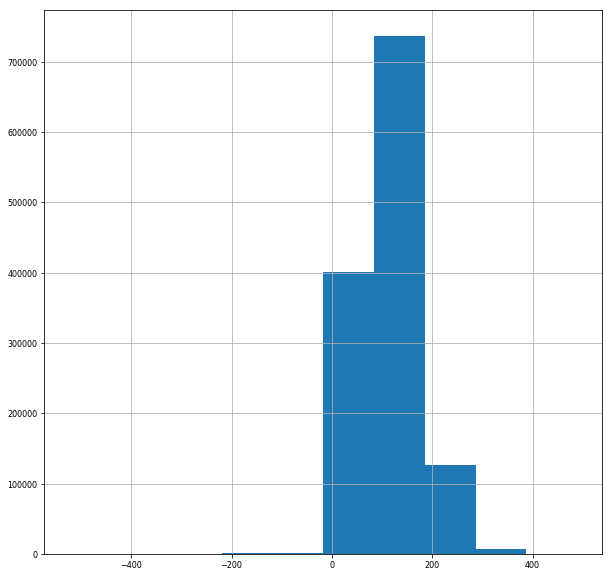

In [12]:
df["Best3BenchKg"].hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8)
print("Biggest Bench: ", df.Best3BenchKg.max())
print("Average Bench: ", df.Best3BenchKg.mean())
print("Lowest Bench: ", df.Best3BenchKg.min())

Biggest Deadlift:  585.0
Average Deadlift:  187.27069592303323
Lowest Deadlift:  -410.0


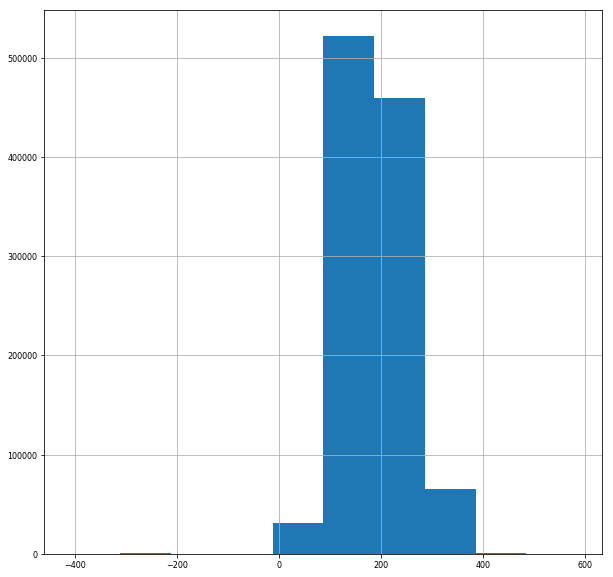

In [13]:
df["Best3DeadliftKg"].hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8)
print("Biggest Deadlift: ", df.Best3DeadliftKg.max())
print("Average Deadlift: ", df.Best3DeadliftKg.mean())
print("Lowest Deadlift: ", df.Best3DeadliftKg.min())

In [14]:
clean_df = df[(df['Best3SquatKg'] > 0)&(df['Best3BenchKg']>0)&(df['Best3DeadliftKg']> 0)&(df['Age']> 0)&(df['BodyweightKg'] > 0)]

clean_df.shape
              

(468076, 37)

In [15]:
clean_df.isnull().sum()

Name                    0
Sex                     0
Event                   0
Equipment               0
Age                     0
AgeClass               86
Division             2959
BodyweightKg            0
WeightClassKg        1092
Squat1Kg           206517
Squat2Kg           209365
Squat3Kg           216142
Squat4Kg           465096
Best3SquatKg            0
Bench1Kg           206553
Bench2Kg           208868
Bench3Kg           216205
Bench4Kg           465524
Best3BenchKg            0
Deadlift1Kg        206373
Deadlift2Kg        210282
Deadlift3Kg        220991
Deadlift4Kg        463638
Best3DeadliftKg         0
TotalKg               789
Place                   0
Wilks                 789
McCulloch             875
Glossbrenner          789
IPFPoints            1533
Tested             136504
Country            292919
Federation              0
Date                    0
MeetCountry             0
MeetState          193888
MeetName                0
dtype: int64

In [16]:
clean_df['Sex'] = np.where(clean_df['Sex']=='M',1,0)


In [17]:
#Split data into training and testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(clean_df, test_size=0.2)

y_train = train['Best3BenchKg']
y_test = test['Best3BenchKg']

X_train = np.array(train[['Age', 'BodyweightKg', 'Sex']])
X_test = np.array(test[['Age', 'BodyweightKg', 'Sex']])

In [18]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 


# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)



In [19]:
# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)







In [20]:
# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)

In [22]:
# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor'],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,83.75
0,RandomForestRegressor,81.17
1,LinearRegression,58.72


In [26]:
# function to predict credit card monthly spending

dtr = DecisionTreeRegressor()
model = dtr.fit(X_train, y_train)

def bench_press_predict(Age, BodyweightKg, Sex):
    
    print("Bench Press Prediction (for trained powerlifter): ", round(float(model.predict([[Age, BodyweightKg, Sex]])),2),"Kg")

#Predict test

bench_press_predict(23, 105, 1)
print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2),"%")

Bench Press Prediction (for trained powerlifter):  135.0 Kg
The accuracy score is:  83.75 %
